# 상태 공간 모형의 소개

## 관측 오차

경우에 따라서는 우리가 가지고 있는 시계열 자료의 값이 우리가 알고 싶어하는 정확한 값이 아닌 경우가 있을 수 있다. 
원래의 시계열을 관측하고 수치화하는 과정에서 원하지 않은, 그렇지만 피할 수 없는 **관측 오차(measurement error)**가 포함되는 경우이다.

예를 들어 다음과 같은 시계열 자료를 보자. 이 시계열 자료는 Shumway and Stoffer (3rd ed)의 예제 6.2 (322페이지)를 참조한 것으로 자료는 http://data.giss.nasa.gov 로부터 얻은 것이다. 이 두 개의 시계열은 두 가지 다른 방법으로 측정한 지표면의 온도이다. 우리는 정확한 온도 자료를 원하지만 두 가지 방법 모두 오차가 존재할 수 있다고 보는 것이 타당할 것이다. 

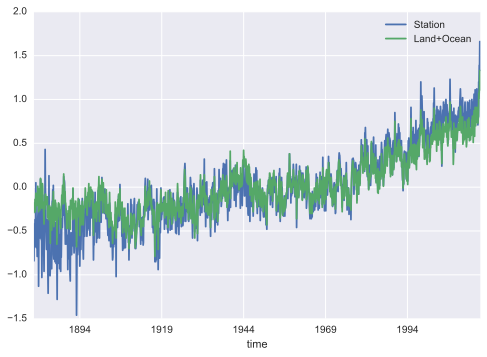

In [1]:
df = pd.read_table("http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.C.txt", 
                   skiprows=[0, 1, 3], sep=" ", skipinitialspace=True, na_values="*").dropna()
df["time"] = pd.date_range("1880", periods=len(df), freq="MS")
df = df.set_index("time")
del df["Year+Month"]
df.plot()
plt.show()

두 관측 자료를 $y_1$, $y_2$라고 하고 관측 오차를 각각 $v_1$, $v_2$라고 하자. 원래의 정확한 온도를 $x$라고 한다면 다음과 같은 관계가 성립한다고 할 수 있다.

$$
\begin{eqnarray}
y_1 &=& x + v_1 \\
y_2 &=& x + v_2 \\
\end{eqnarray}
$$

행렬 방정식으로 쓰면 다음과 같다.

$$
y=
\begin{bmatrix}
y_1 \\
y_2 \\
\end{bmatrix}
=
\begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
x
+
\begin{bmatrix}
v_1 \\
v_2 \\
\end{bmatrix}
$$

우리가 직접 관측할 수는 없지만(unobservable) 알고 싶어하는 자료 $x$는 **상태 변수(state variable)** 변수라고 한다. 상태 변수는 원래 동적 시스템의 움직임을 정의하기 위해 사용된다.

## 동적 시스템

동적 시스템(dynamic system)은 입력 시계열(input time series)을 받아서 출력 시계열(out time series)을 내놓는 시스템을 말한다.

ARMA 모형도 innovation 시계열 $e_t$를 입력 받아서 시계열 $y_t$를 출력하므로 동적 시스템의 하나로 볼 수 있다.

## 상태 변수

상태 변수의 정확한 정의는 **동적 시스템의 현재 상태를 정의하는 값의 집합**이다.  시작 시각 $t_0$에 특정한 상태 $x_0$ 로부터 출발한 동적 시스템은 시간 $t_0$ 이후의 입력이 동일하면 출력도 모두 동일해야 한다.

AR(p) 모형을 따르는 동적 시스템이라면 $p$개의 과거 $Y$값 $\{ Y_{t-1}, \cdots, Y_{t-p} \}$이 상태 변수라고 할 수 있다.

$$ Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + e_t $$

동일한  $\{ Y_{t-1}, \cdots, Y_{t-p} \}$ 값에서 시작하여 입력으로 들어오는 이후의 $e_t$ 값이이 같다면 항상 동일한 $Y$을 출력하기 때문이다.

마찬가지로 ARMA(p,q) 모형을 따르는 동적 시스템이라면 $p$개의 과거 $Y$값 $\{ Y_{t-1}, \cdots, Y_{t-1} \}$과 $q$개의 과거 $e$값 $\{ e_{t-1}, \cdots, e_{t-q} \}$이 상태 변수라고 할 수 있다.

$$ Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1}  \cdots  - \theta_q e_{t-q} $$

## 상태 공간 모형

**상태 공간 모형(state space model)**이란 시계열 생성 구조를 다음과 같이 상태 전이식(state transition equation)과 관측식(observation equation)이라는 두 개의 수식으로 정의하는 시계열 모형을 말한다.

### 상태 전이식(state transition equation)

상태 전이식은 이전의 상태 $x_{t-1}$와 현재 생성된 innovation 입력 $w_t$에 의해 현재의 상태 $x_{t}$가 생성되는 관계를 표현한 식이다.

$$ x_{t} = f(x_{t-1}, w_t) $$
  

### 관측식(observation equation)

관측식은 현재의 상태 $x_t$와 관측 잡음 $v_t$에 의해 실제로 측정가능한 출력 $y_t$가 생성되는 관계를 표현한 식이다.

$$ y_{t} = g(x_t, v_t) $$

두 개의 수식으로 정의하는 

## 동적 선형 모형 (DLM: Dynamic Linear Model)

동적 선형 모형은 상태 전이식과 관측식을 모두 선형 행렬 방정식으로 표현할 수 있는 모형으로 선형 상태 공간 모형(linear state space model)이라고도 불린다. 또 선형 동적 모형에서는 innovation 과정과 관측 잡음 과정이 가우시안 백색 잡음이라고 가정한다.

$$ 
\begin{eqnarray}
x_{t} &=& \Phi_t x_{t-1} &+& w_t &,\;\;\; & w_t \sim \mathcal{N}(0, W_t)\\
y_{t} &=& A_t x_{t} &+& v_t &,\;\;\; & v_t \sim \mathcal{N}(0, V_t) \\
\end{eqnarray}
$$

이 식에서 사용된 기호는 다음과 같다.

* $x_t \in \mathbf{R}^{N}$ 상태 변수 벡터
* $\Phi_t \in \mathbf{R}^{N\times N}$ 전이 행렬(transition matrix) 
* $w_t \in \mathbf{R}^{N}$ innovation (또는 shock 벡터)
* $W_t \in \mathbf{R}^{N\times N}$ innovation 공분산 (covariance) 행렬
* $y_t \in \mathbf{R}^{M}$ 출력 벡터
* $A_t \in \mathbf{R}^{N\times M}$ 관측 행렬(measurement matrix) 또는 설계 행렬(design matrix)
* $v_t \in \mathbf{R}^{M}$ 관측 잡음 벡터 
* $V_t \in \mathbf{R}^{M\times M}$ 관측 잡음 공분산 (covariance) 행렬


## 상태 공간 모형의 예

### 히든 마코프 모형 (HMM: Hidden Markov Model)

상태 공간 모형에서 상태 변수 $x$의 값이 연속 확률 변수가 아니라 1차원 이산 확률 변수(discrete random variable)인 경우에는 히든 마코프 모형이 된다. 히든 마코프 모형의 상태 전이식은 다음과 같은 조건부 확률로 정의된다.

$$ P(x_{t} = x_i | x_{t-1} = x_j ) $$

히든 마코프 모형은 주로 음성 처리에서 많이 사용되지만 경제학 분야에서도 구조적 변화에 의한 시계열 특성이 변화하는 경우에 사용된다.

### 확률적 변동성 모형

주가(stock price) 등의 금융 시계열 모형으로 많이 사용되는 확률적 변송성 모형(stochastic volatility model)도 상태 공간 모형의 한 예라고 볼 수 있다. 확률적 변동성 모형은 ARCH(Autoregressive conditional heteroskedasticity) 혹은 GARCH(Generalized Autoregressive conditional heteroskedasticity) 모형과 달리 변동성 자체를 하나의 독립적인 상태 변수로 가정한다. 확률적 변동성 모형 중 널리 사용되는 Heston 모형은 다음과 같이 분산(variance) 상태 변수 $\nu$를 가지는 연속 시간 모형이다.

$$ 
\begin{eqnarray}
dS_t   &=& \mu S_t\,dt + \sqrt{\nu_t} S_t\,dW^S_t  \\
d\nu_t &=& \kappa(\theta - \nu_t)\,dt + \xi \sqrt{\nu_t}\,dW^{\nu}_t 
\end{eqnarray}
$$

## 상태 공간 모형의 응용

상태 공간 모형은 이외에도 자동 제어(automatic), 항법(navigation) 시스템. 신호처리(signal processing) 분야에 많이 사용된다. 센서를 사용하여 관측 가능한 일부 신호를 사용하여 잡음이 없은 원래의 신호를 추정한다거나 제어에 필요한 위치, 속도, 등의 상태 변수를 추정해 낼 수 있기 때문이다.

다음은 이러한 분야에서 상태 공간 모형이 사용되는 몇가지 예이다.

* Inverted Pendulum
  * https://www.youtube.com/watch?v=B6vr1x6KDaY

* 카메라 안정기 
  * https://www.youtube.com/watch?v=X2vvdJGxPkI

* 드론 항법 장치
  * https://www.youtube.com/watch?v=7BoDS9Gzsko

최근에는 경제학이나 일반 시계열 모형에서도 상태 공간 모형이 일반화 되었다. 상태공간 모형을 사용하는 경우에는 기존의 ARMA 모형에서 다루기 힘든 다음과 같은 문제들을 해결하는데 도움을 준다.

* 시계열의 구조적 모형(structural model)
* 일부 누락된 데이터(missing data)가 있는 경우
* 시간에 따라 모형 계수가 변화(time-varing or switching)하는 경우 
* 변수의 분포가 정규 분포가 아닌 경우

## 필터링과 스무딩

상태 공간 모형을 사용하는 것은 기존의 예측 문제와 더불어 현재 혹은 상태 변수 값을 추정하는 것을 목표로 한다는 것을 뜻한다. 이를 필터링(filtering) 문제와 스무딩(smoothing) 문제라고 한다.

필터링(filtering) 문제는 현재까지 수집한 관측치 $y_1, \cdots, y_{t}$를 이용해서 현재의 상태 변수 값 $x_t$을 추정하는 문제이다. 필터링 문제는 앞에서 예를 들었던 지표면 온도에서 실제 온도를 추정하는 단순한 문제부터 관측 잡음이 있는 GPS 신호를 기반으로 현재의 정확한 위치를 추정하는 항법 장치까지 널리 사용된다.
 
스무딩(smoothing) 문제는 필터링 문제와 달리 현재까지 수집한 관측치 $y_1, \cdots, y_{t}$를 이용해서 현재까지의 상태 변수 히스토리 $x_1, \cdots, x_t$을 전체를 모두 재추정하는 문제를 말한다. 금융 분야에서 팩터 모형(factor model)의 계수를 추정하는 문제도 스무딩 문제에 속한다. 또한 시계열 자료 중 누락된 자료(missing data)가 있는 경우에도 스무딩 문제 해결을 통해 누락된 자료를 추정할 수 있다.

## 칼만 필터

선형 동적 모형에 대한 필터링 문제와 스무딩 문제를 푸는 방법 중 가장 널리 쓰이는 것이 바로 칼만 필터 방법이다. 칼만 필터는 확률 변수의 분포를 갱신하는 베이지안 필터(Bayesian filter)의 한 종류이다. 선형 동적 모형이 가우시안 분포를 가지는 선형 시스템이라는 제약 조건을 훌륭하게 사용하여 상태 변수의 평균과 분산을 간단히 갱신할 수 있는 효율적인 알고리즘이다.

## 마코프 체인 몬테카를로 (MCMC: Markov Chain Monte Carlo)

상태 공간 모형의 확률 분포가 가우시안 정규 분포가 아니거나 정확한 분포의 수식을 알 수 없을 때는 마코프 체인 몬테카를로 방법(MCMC: Markov Chain Monte Carlo)을 사용할 수 있다. MCMC 방법은 특정한 마코프 체인 확률 과정을 사용하여 생성한 시뮬레이션을 통해 분포의 형상을 추정한다.